In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math


def bit_to_freq(bits, N):
    possible = [i for i in range(N)]
    for b in bits:
        if b[0]:
            possible = possible[:len(possible)//2]
        else:
            possible = possible[len(possible)//2:]
    return possible[0]


Bad key "lines.dashed_pattern" on line 18 in
c:\users\jains\appdata\local\programs\python\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad key "lines.dashdot_pattern" on line 19 in
c:\users\jains\appdata\local\programs\python\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad key "lines.dotted_pattern" on line 20 in
c:\users\jains\appdata\local\programs\python\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
o

Notes
- Changed depth from 6 layers to 3 conv layers
- Instance norm/batch norm/choice of activation did not really change accuracy
- Currently exhaustively check half of most signficant bits (one hamming dist away) to see if smaller residual
- Tried making parity bit but nn classifier could not learn

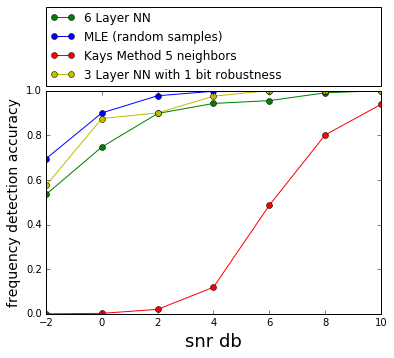

MLE [(8, 1.0), (6, 1.0), (4, 0.997), (2, 0.977), (0, 0.9), (-2, 0.695)]
NN 6layer [(10, 1.0), (8, 0.99), (6, 0.955), (4, 0.9425), (2, 0.8975), (0, 0.7475), (-2, 0.535)]
NN 3layer [(10, 1.0), (8, 1.0), (6, 1.0), (4, 0.975), (2, 0.9), (0, 0.875), (-2, 0.575)]


In [7]:
# frequency detection accuracy for vaious methods - 16384 possible freqs each
# NN - 6 conv layers using divide conquer method. 40 samples at each input (each layer has 2 input, 2 output channels, filtersize=3)
# MLE - 300 total samples
# Kays - 300 total samples

plt.plot(np.load('../data/divide_conquer/snrs_16384.npy'), np.load('../data/divide_conquer/snr_acc_frequency_16384.npy'), '-go', label='6 Layer NN')
plt.plot(np.load('../data/freq_detect/snrs.npy')[:-2], np.load('../data/freq_detect/mle_random.npy')[:-2], '-bo', label='MLE (random samples)')
plt.plot(np.load('../data/divide_conquer/snrs_kay.npy'), np.load('../data/divide_conquer/kay_consec_T5.npy'), '-ro', label='Kays Method 5 neighbors')
plt.plot(np.load('../data/freq_new_network/snrs.npy'), np.load('../data/freq_new_network/acc_frequency_2layer_2.npy'), '-yo', label='3 Layer NN with 1 bit robustness')


plt.xlabel('snr db', fontsize=18)
plt.ylabel('frequency detection accuracy', fontsize=14)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=1, mode="expand", borderaxespad=0.)
plt.show()
print('MLE', list(zip(np.load('../data/freq_detect/snrs.npy')[:-2], np.load('../data/freq_detect/mle_random.npy')[:-2])))
print('NN 6layer', list(zip(np.load('../data/freq_new_network/snrs.npy'), np.load('../data/divide_conquer/snr_acc_frequency_16384.npy'))))
print('NN 3layer', list(zip(np.load('../data/freq_new_network/snrs.npy'), np.load('../data/freq_new_network/acc_frequency_2layer_2.npy'))))